In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

2023-12-04 00:01:37.445443: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 00:01:37.497237: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 00:01:37.497287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 00:01:37.499109: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 00:01:37.509735: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 00:01:37.510757: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

In [3]:
training_images, testing_images = training_images / 255, testing_images / 255

In [4]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Dear', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

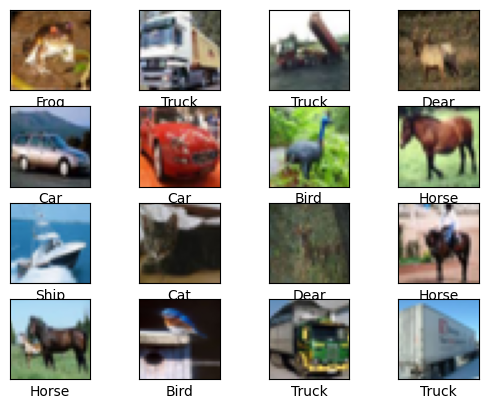

In [5]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [6]:
training_images = training_images[:20_000]
training_labels = training_labels[:20_000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [9]:
model = models.Sequential()

In [10]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))

In [11]:
model.add(layers.MaxPooling2D((2,2)))

In [12]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [13]:
model.add(layers.MaxPooling2D((2,2)))

In [14]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [15]:
model.add(layers.Flatten())

In [16]:
model.add(layers.Dense(64,activation='relu'))

In [18]:
model.add(layers.Dense(10,activation='softmax'))

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(training_images,training_labels,epochs=10,validation_data=(testing_images,testing_labels))

Epoch 1/10


2023-12-04 00:16:27.847414: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.


625/625 [==============================] - 13s 20ms/step - loss: 1.7539 - accuracy: 0.3490 - val_loss: 1.5036 - val_accuracy: 0.4498
Epoch 2/10
625/625 [==============================] - 13s 21ms/step - loss: 1.3923 - accuracy: 0.4988 - val_loss: 1.3948 - val_accuracy: 0.4997
Epoch 3/10
625/625 [==============================] - 13s 20ms/step - loss: 1.2452 - accuracy: 0.5545 - val_loss: 1.2056 - val_accuracy: 0.5748
Epoch 4/10
625/625 [==============================] - 13s 20ms/step - loss: 1.1285 - accuracy: 0.6013 - val_loss: 1.1253 - val_accuracy: 0.6012
Epoch 5/10
625/625 [==============================] - 13s 21ms/step - loss: 1.0362 - accuracy: 0.6327 - val_loss: 1.0823 - val_accuracy: 0.6200
Epoch 6/10
625/625 [==============================] - 12s 20ms/step - loss: 0.9633 - accuracy: 0.6597 - val_loss: 1.1029 - val_accuracy: 0.6122
Epoch 7/10
625/625 [==============================] - 13s 21ms/step - loss: 0.8894 - accuracy: 0.6863 - val_loss: 1.0297 - val_accuracy: 0.6395
Epo

In [21]:
loss,accuracy = model.evaluate(testing_images,testing_labels)

125/125 [==============================] - 1s 8ms/step - loss: 1.0399 - accuracy: 0.6438


In [24]:
print(f'Loss:{loss}\nAccuracy:{accuracy}')

Loss:1.0399236679077148
Accuracy:0.643750011920929


In [25]:
model.save('image_classification.model')

INFO:tensorflow:Assets written to: image_classification.model/assets


INFO:tensorflow:Assets written to: image_classification.model/assets
